In [2]:
import pandas as pd
import openpyxl

# Using the usecase1 test dataset

In [171]:
df = pd.read_csv('usecase_1_.csv')

In [172]:
df.drop(columns='Acronym', inplace=True)

In [173]:
df.head()

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,0,1,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,...,Allocation: NON_RANDOMIZED|Intervention Model:...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov..."
1,1,2,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,DRUG: ENA713,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CENA713BCN05,2014-08,2015-09,2015-09,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN
2,2,5,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,DEVICE: Saneso 360° gastroscope,...,Allocation: NA|Intervention Model: SINGLE_GROU...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaN,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN
3,3,6,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaN,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN
4,4,8,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,NTFC 1105.0,2012-05,2013-03,2013-07,2012-04-19,NaN,2014-05-06,NaN,NaN


In [174]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Checking the number of null values

In [175]:
null_values = df.isnull().sum()
print(null_values)

NCT Number                         0
Study Title                        0
Study URL                          0
Study Status                       0
Brief Summary                      0
Study Results                      0
Conditions                        30
Interventions                   5656
Primary Outcome Measures        3077
Secondary Outcome Measures     24780
Other Outcome Measures        110056
Sponsor                            0
Collaborators                  96614
Sex                              142
Age                                0
Phases                         34885
Enrollment                      1833
Funder Type                        0
Study Type                         0
Study Design                     652
Other IDs                          3
Start Date                      1739
Primary Completion Date         5994
Completion Date                 5326
First Posted                       0
Results First Posted           85925
Last Update Posted                 0
L

In [176]:
df.head(1)

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov..."


# Fixing the datatype of date columns

In [177]:
from datetime import datetime

# Function to restructure date format
def restructure_date(date_str):
    if pd.isna(date_str):
        return date_str
    parts = date_str.split('-')
    if len(parts) == 1:
        return f"{parts[0]}-01-01"
    elif len(parts) == 2:
        return f"{parts[0]}-{parts[1]}-01"
    return date_str

date_columns = [
    'Start Date', 
    'Primary Completion Date',
    'Completion Date', 
    'First Posted', 
    'Results First Posted', 
    'Last Update Posted'
]

for column in date_columns:
    df[column] = df[column].apply(restructure_date)
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d', errors='coerce')



In [179]:
print(df['Start Date'].head(36))

0    2017-10-17
1    2014-08-01
2    2020-08-01
3    2017-03-08
4    2012-05-01
5    2015-06-02
6    2016-05-11
7    2011-10-13
8    2023-05-24
9    2013-12-01
10   2021-08-11
11   2009-07-01
12   2021-04-14
13   2022-04-01
14   2022-12-21
15   2021-02-04
16   2014-04-01
17   2008-10-01
18   2003-05-01
19   2017-12-11
20   2022-03-01
21   2018-08-21
22   2017-11-16
23   2012-02-01
24   2020-07-28
25   2018-07-18
26   2009-12-01
27   2004-03-01
28   2004-11-01
29   2009-09-01
30   2011-03-01
31   2015-09-01
32   2010-11-10
33   2011-10-01
34   2008-01-01
35   2023-08-30
Name: Start Date, dtype: datetime64[ns]


In [180]:
for column in date_columns:
    print(f"{column}: {df[column].dtype}")


Start Date: datetime64[ns]
Primary Completion Date: datetime64[ns]
Completion Date: datetime64[ns]
First Posted: datetime64[ns]
Results First Posted: datetime64[ns]
Last Update Posted: datetime64[ns]


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117980 entries, 0 to 117979
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   NCT Number                  117980 non-null  object        
 1   Study Title                 117980 non-null  object        
 2   Study URL                   117980 non-null  object        
 3   Study Status                117980 non-null  object        
 4   Brief Summary               117980 non-null  object        
 5   Study Results               117980 non-null  object        
 6   Conditions                  117950 non-null  object        
 7   Interventions               112324 non-null  object        
 8   Primary Outcome Measures    114903 non-null  object        
 9   Secondary Outcome Measures  93200 non-null   object        
 10  Other Outcome Measures      7924 non-null    object        
 11  Sponsor                     117980 non-

NCT Number                     0.000000
Study Title                    0.000000
Study URL                      0.000000
Study Status                   0.000000
Brief Summary                  0.000000
Study Results                  0.000000
Conditions                     0.025428
Interventions                  4.794033
Primary Outcome Measures       2.608069
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Sponsor                        0.000000
Collaborators                 81.890151
Sex                            0.120359
Age                            0.000000
Phases                        29.568571
Enrollment                     1.553653
Funder Type                    0.000000
Study Type                     0.000000
Study Design                   0.552636
Other IDs                      0.002543
Start Date                     1.473979
Primary Completion Date        5.080522
Completion Date                4.514324
First Posted                   0.000000


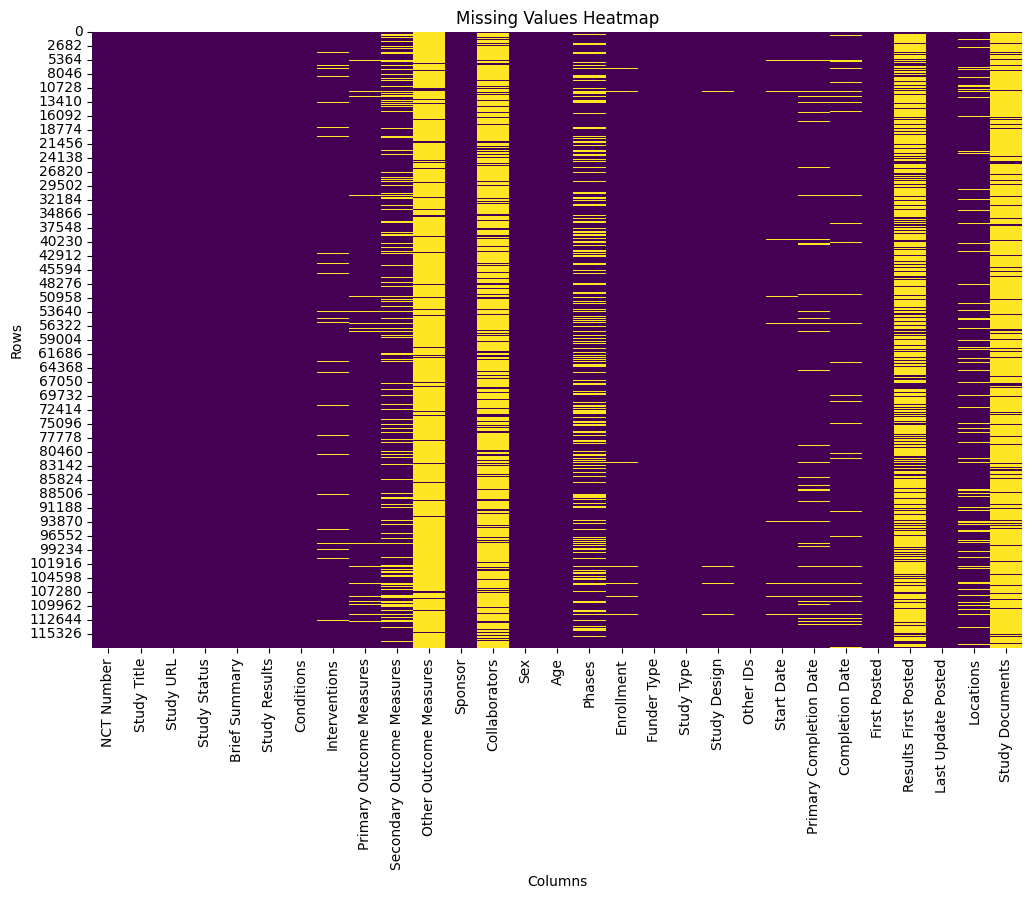

Columns with more than 20% missing values:
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Collaborators                 81.890151
Phases                        29.568571
Results First Posted          72.830141
Study Documents               89.101543
dtype: float64


In [182]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

# Handling missing values from now on

## Fixing null values of phases column to "MISSING"

In [183]:
df['Phases'].fillna('missing', inplace=True)

/var/folders/yz/tftjkdf923x_65slnh0_rfnm0000gn/T/ipykernel_43996/3358784198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phases'].fillna('missing', inplace=True)


Unnamed: 0.1                   0.000000
Unnamed: 0                     0.000000
NCT Number                     0.000000
Study Title                    0.000000
Study URL                      0.000000
Study Status                   0.000000
Brief Summary                  0.000000
Study Results                  0.000000
Conditions                     0.025428
Interventions                  4.794033
Primary Outcome Measures       2.608069
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Sponsor                        0.000000
Collaborators                 81.890151
Sex                            0.120359
Age                            0.000000
Phases                        29.568571
Enrollment                     1.553653
Funder Type                    0.000000
Study Type                     0.000000
Study Design                   0.552636
Other IDs                      0.002543
Start Date                     1.473979
Primary Completion Date        5.080522


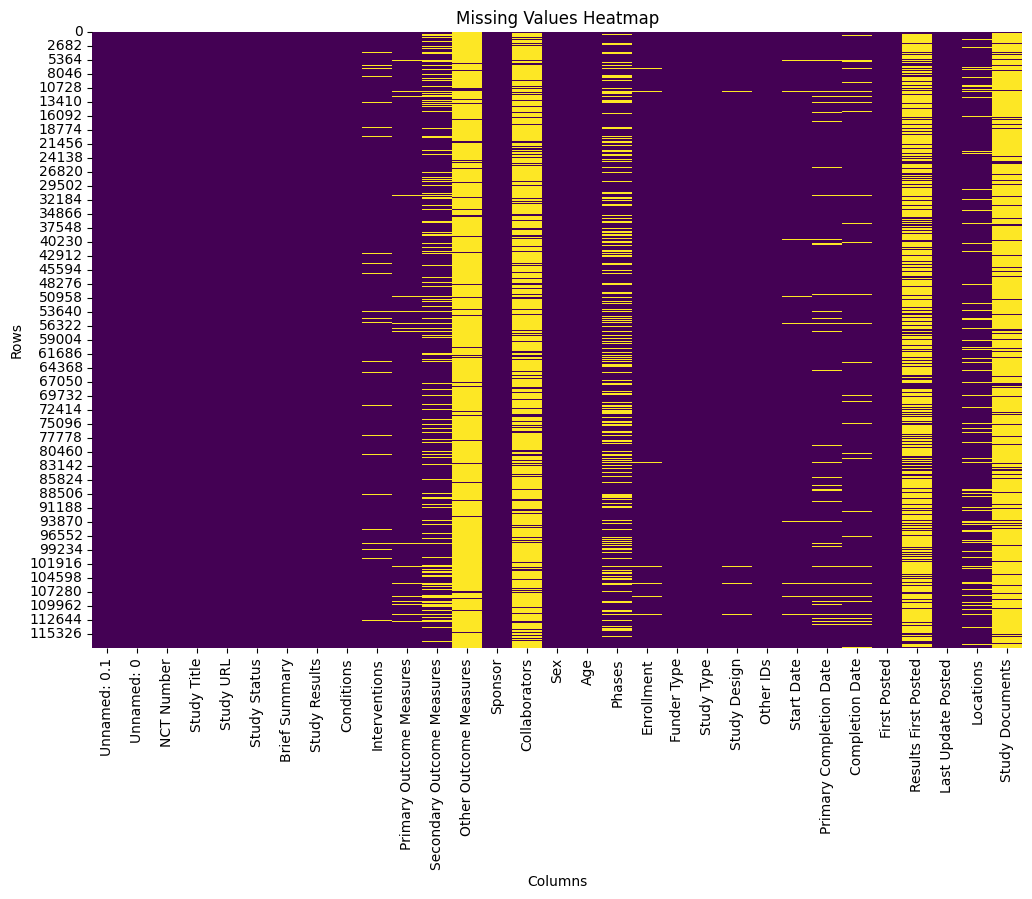

Columns with more than 20% missing values:
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Collaborators                 81.890151
Phases                        29.568571
Results First Posted          72.830141
Study Documents               89.101543
dtype: float64


In [184]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = usecase1_test_v2.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(usecase1_test_v2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

## Made a new column "OTHER OPTIMIZED MEASURES" summation of secondary and other measures


In [185]:
def optimized_measure(row):
    if pd.isna(row['Secondary Outcome Measures']) and pd.isna(row['Other Outcome Measures']):
        return None
    elif pd.isna(row['Secondary Outcome Measures']):
        return row['Other Outcome Measures']
    elif pd.isna(row['Other Outcome Measures']):
        return row['Secondary Outcome Measures']
    else:
        return row['Secondary Outcome Measures'] + row['Other Outcome Measures']

df['Other Optimized Measure Columns'] = df.apply(optimized_measure, axis=1)
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,Other Optimized Measure Columns
0,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov...",Area Under the Concentration-time Curve of BI ...
1,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,Change From Baseline in the Alzheimer's Diseas...,...,CENA713BCN05,2014-08-01,2015-09-01,2015-09-01,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN,Change From Baseline in the Alzheimer's Diseas...
2,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,DEVICE: Saneso 360° gastroscope,"Successful EGD, Procedure success is assessed ...",Endoscopist qualitative rating of the Saneso 3...,...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaT,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN,Endoscopist qualitative rating of the Saneso 3...
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,"Performance Endpoint, successful insertion, pl...","Safety Endpoint (Rate of MACCE), Rate of MACCE...",...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaT,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN,"Safety Endpoint (Rate of MACCE), Rate of MACCE..."
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,"Therapeutic Cure, Patients with both mycologic...",NaN,...,NTFC 1105.0,2012-05-01,2013-03-01,2013-07-01,2012-04-19,NaT,2014-05-06,NaN,NaN,None


NCT Number                          0.000000
Study Title                         0.000000
Study URL                           0.000000
Study Status                        0.000000
Brief Summary                       0.000000
Study Results                       0.000000
Conditions                          0.025428
Interventions                       4.794033
Primary Outcome Measures            2.608069
Secondary Outcome Measures         21.003560
Other Outcome Measures             93.283607
Sponsor                             0.000000
Collaborators                      81.890151
Sex                                 0.120359
Age                                 0.000000
Phases                              0.000000
Enrollment                          1.553653
Funder Type                         0.000000
Study Type                          0.000000
Study Design                        0.552636
Other IDs                           0.002543
Start Date                          1.473979
Primary Co

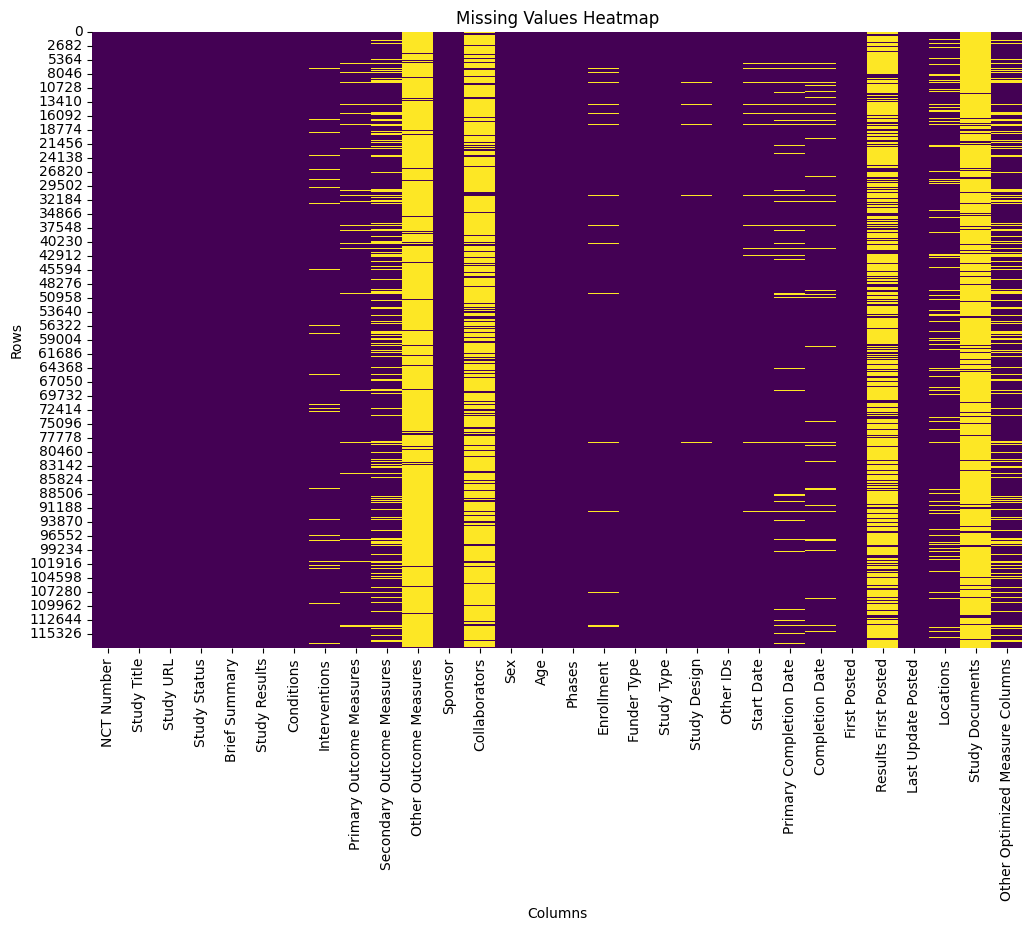

Columns with more than 20% missing values:
Secondary Outcome Measures         21.003560
Other Outcome Measures             93.283607
Collaborators                      81.890151
Results First Posted               72.830141
Study Documents                    89.101543
Other Optimized Measure Columns    20.339041
dtype: float64


In [186]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

# we are making a new column, as Sponsors & Collaborators, summation of sponsor and collaborators columns

In [188]:
def optimized_measure(row):
    if pd.isna(row['Sponsor']) and pd.isna(row['Collaborators']):
        return None
    elif pd.isna(row['Sponsor']):
        return row['Collaborators']
    elif pd.isna(row['Collaborators']):
        return row['Sponsor']
    else:
        return row['Sponsor'] + row['Collaborators']

df['Sponsors & Collaborators'] = df.apply(optimized_measure, axis=1)
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,Other Optimized Measure Columns,Sponsors & Collaborators
0,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,...,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov...",Area Under the Concentration-time Curve of BI ...,Boehringer Ingelheim
1,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,Change From Baseline in the Alzheimer's Diseas...,...,2014-08-01,2015-09-01,2015-09-01,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN,Change From Baseline in the Alzheimer's Diseas...,Novartis Pharmaceuticals
2,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,DEVICE: Saneso 360° gastroscope,"Successful EGD, Procedure success is assessed ...",Endoscopist qualitative rating of the Saneso 3...,...,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaT,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN,Endoscopist qualitative rating of the Saneso 3...,Saneso Inc.West Virginia University
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,"Performance Endpoint, successful insertion, pl...","Safety Endpoint (Rate of MACCE), Rate of MACCE...",...,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaT,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN,"Safety Endpoint (Rate of MACCE), Rate of MACCE...",Innovative Cardiovascular SolutionsMeditrial E...
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,"Therapeutic Cure, Patients with both mycologic...",NaN,...,2012-05-01,2013-03-01,2013-07-01,2012-04-19,NaT,2014-05-06,NaN,NaN,None,Taro Pharmaceuticals USA


NCT Number                          0.000000
Study Title                         0.000000
Study URL                           0.000000
Study Status                        0.000000
Brief Summary                       0.000000
Study Results                       0.000000
Conditions                          0.025428
Interventions                       4.794033
Primary Outcome Measures            2.608069
Secondary Outcome Measures         21.003560
Other Outcome Measures             93.283607
Sponsor                             0.000000
Collaborators                      81.890151
Sex                                 0.120359
Age                                 0.000000
Phases                              0.000000
Enrollment                          1.553653
Funder Type                         0.000000
Study Type                          0.000000
Study Design                        0.552636
Other IDs                           0.002543
Start Date                          1.473979
Primary Co

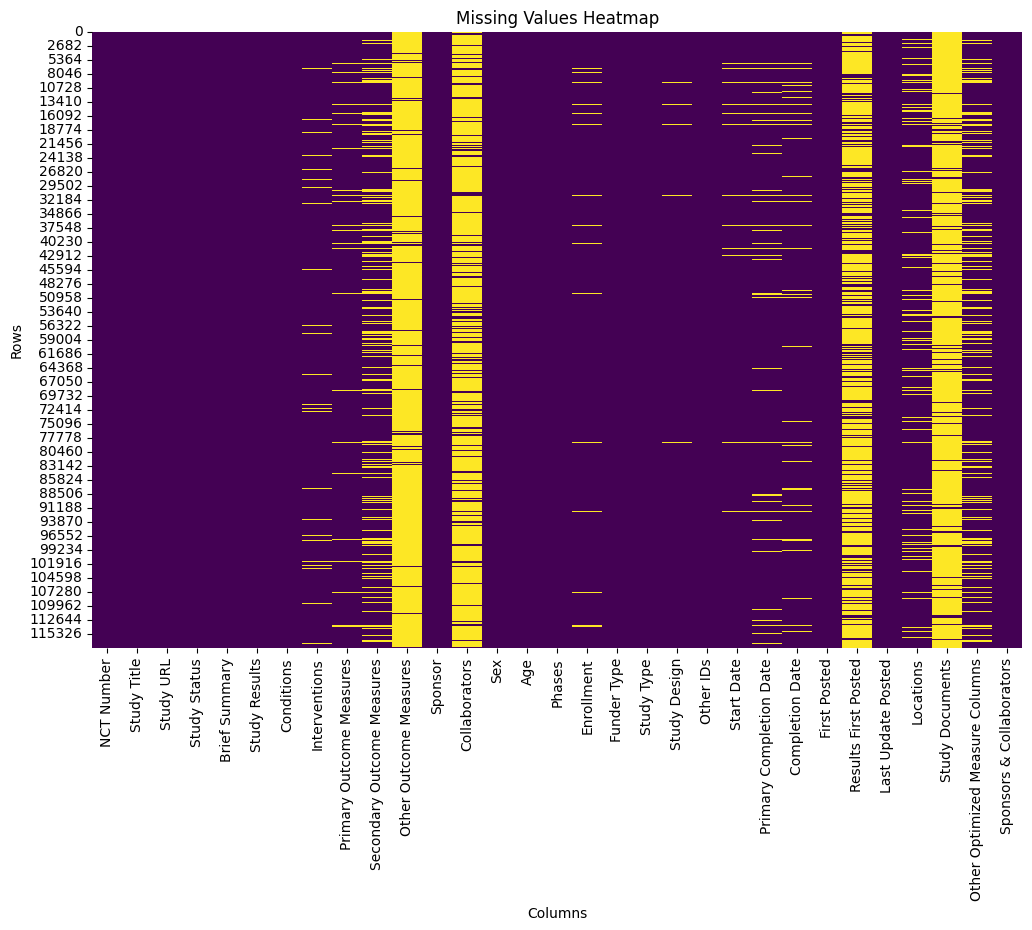

Columns with more than 20% missing values:
Secondary Outcome Measures         21.003560
Other Outcome Measures             93.283607
Collaborators                      81.890151
Results First Posted               72.830141
Study Documents                    89.101543
Other Optimized Measure Columns    20.339041
dtype: float64


In [189]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

## dropping some unnecessary columns

In [190]:
df_v2 = df.drop(columns=['Secondary Outcome Measures', 'Other Outcome Measures','Study Documents', 'Results First Posted', 'Sponsor', 'Collaborators'])

NCT Number                          0.000000
Study Title                         0.000000
Study URL                           0.000000
Study Status                        0.000000
Brief Summary                       0.000000
Study Results                       0.000000
Conditions                          0.025428
Interventions                       4.794033
Primary Outcome Measures            2.608069
Sex                                 0.120359
Age                                 0.000000
Phases                              0.000000
Enrollment                          1.553653
Funder Type                         0.000000
Study Type                          0.000000
Study Design                        0.552636
Other IDs                           0.002543
Start Date                          1.473979
Primary Completion Date             5.080522
Completion Date                     4.514324
First Posted                        0.000000
Last Update Posted                  0.000000
Locations 

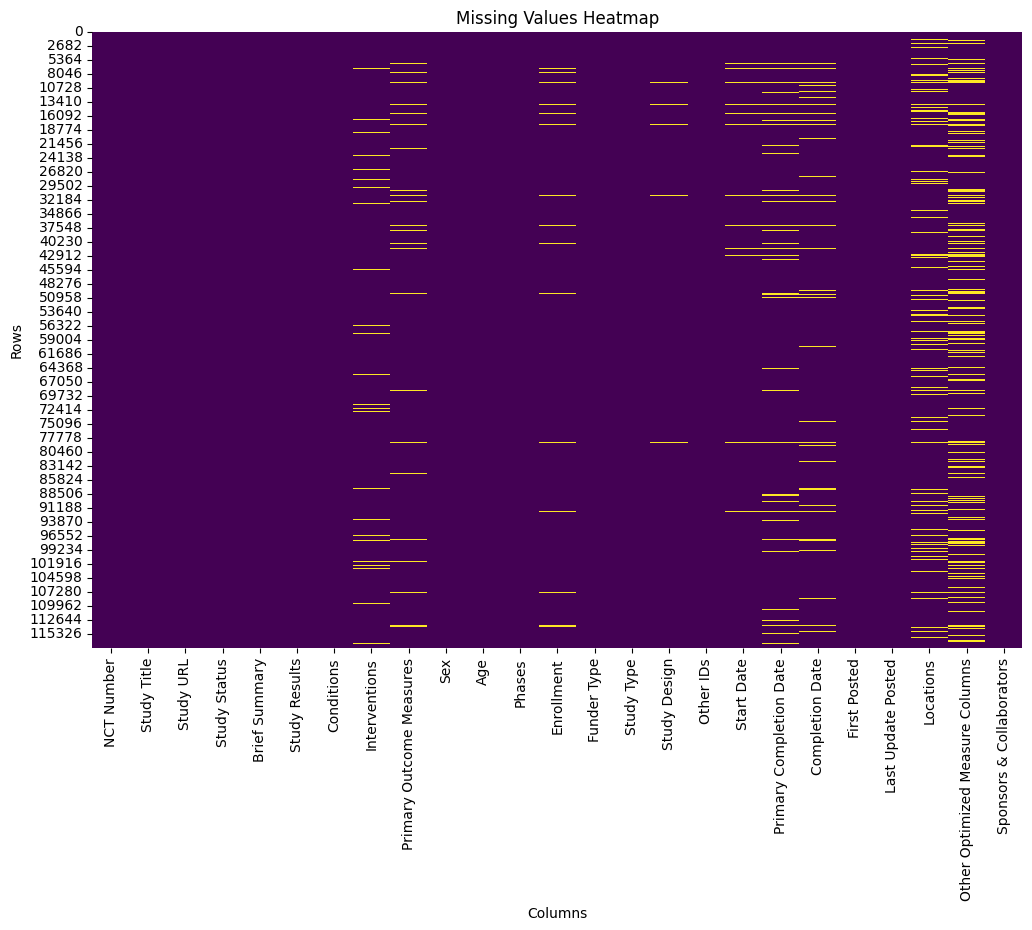

Columns with more than 20% missing values:
Other Optimized Measure Columns    20.339041
dtype: float64


In [192]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df_v2.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_v2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

In [193]:
df_v2.to_csv('usecase_1_cleaned.csv', index=False)

In [194]:
df_v2.sample(100).to_csv('usecase_1_cleaned_sample.csv', index=False)

# Eligibility work

In [195]:
# Read the txt file
eligibilities = pd.read_csv('eligibilities.txt', sep='|')

# Save it as a CSV file
eligibilities.to_csv('eligibilities.csv', index=False)

In [198]:
eligibilities = pd.read_csv('eligibilities.csv')

In [213]:
eligibilities.sample(10)

,id,nct_id,sampling_method,gender,minimum_age,maximum_age,healthy_volunteers,population,criteria,gender_description,gender_based,adult,child,older_adult
354456,5886989,NCT05246748,NaN,FEMALE,19 Years,38 Years,t,NaN,Inclusion Criteria:~* Primiparous women with 2...,NaN,NaN,t,f,f
287181,6318794,NCT03896243,PROBABILITY_SAMPLE,FEMALE,18 Years,35 Years,t,Patients who had uterine artery ligation durin...,Inclusion Criteria:~* age 18- 35 years~* no sy...,All participants are females undergoing delive...,t,t,f,f
141526,6104654,NCT02443740,NaN,ALL,18 Years,55 Years,t,NaN,Inclusion Criteria:~•Healthy male and/or femal...,NaN,NaN,t,f,f
2657,6261390,NCT03492632,NON_PROBABILITY_SAMPLE,FEMALE,18 Years,40 Years,t,The study population will be reproductive age ...,Inclusion Criteria:~* Reproductive age group w...,Female,t,t,f,f
251115,6289529,NCT05350748,NON_PROBABILITY_SAMPLE,ALL,1 Day,120 Years,t,"Any gender, any age for participants with MDS....",* INCLUSION CRITERIA - MDS Participants~* Any ...,NaN,NaN,t,t,t
445496,6151451,NCT04052724,NaN,ALL,18 Years,NaN,t,NaN,Inclusion Criteria:~* must be 18 years old or ...,NaN,NaN,t,f,t
100161,6021193,NCT04908423,NaN,ALL,18 Years,79 Years,f,NaN,Inclusion Criteria:~* Diagnosis of hemiparesis...,NaN,NaN,t,f,t
36878,5980576,NCT05561972,NaN,FEMALE,45 Years,65 Years,t,NaN,Inclusion Criteria:Postmenopausal women who ha...,NaN,NaN,t,f,t
320104,5867391,NCT05538897,NaN,FEMALE,18 Years,NaN,f,NaN,Inclusion Criteria:~* Patients must have grade...,NaN,NaN,t,f,t
149602,6110340,NCT00718926,PROBABILITY_SAMPLE,ALL,20 Years,NaN,t,The dry eye patients at the clinic of Kyoto Pr...,Inclusion Criteria:~* dry eye patients~* contr...,NaN,NaN,t,f,t


In [200]:
eligibilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502301 entries, 0 to 502300
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  502301 non-null  int64 
 1   nct_id              502301 non-null  object
 2   sampling_method     111512 non-null  object
 3   gender              501870 non-null  object
 4   minimum_age         469401 non-null  object
 5   maximum_age         266189 non-null  object
 6   healthy_volunteers  489578 non-null  object
 7   population          111500 non-null  object
 8   criteria            502210 non-null  object
 9   gender_description  9254 non-null    object
 10  gender_based        13901 non-null   object
 11  adult               502301 non-null  object
 12  child               502301 non-null  object
 13  older_adult         502301 non-null  object
dtypes: int64(1), object(13)
memory usage: 53.7+ MB


In [201]:
eligibilities.isnull().sum()

id                         0
nct_id                     0
sampling_method       390789
gender                   431
minimum_age            32900
maximum_age           236112
healthy_volunteers     12723
population            390801
criteria                  91
gender_description    493047
gender_based          488400
adult                      0
child                      0
older_adult                0
dtype: int64

In [202]:
null_percentage = eligibilities.isnull().mean() * 100
print(null_percentage)

id                     0.000000
nct_id                 0.000000
sampling_method       77.799765
gender                 0.085805
minimum_age            6.549858
maximum_age           47.006078
healthy_volunteers     2.532943
population            77.802154
criteria               0.018117
gender_description    98.157678
gender_based          97.232536
adult                  0.000000
child                  0.000000
older_adult            0.000000
dtype: float64


In [214]:
eligibilities.drop(columns=['sampling_method','gender', 'minimum_age', 'maximum_age', 'healthy_volunteers', 'population', 'gender_description', 'gender_based', 'adult', 'child', 'older_adult'], inplace=True)

In [215]:
null_percentage = eligibilities.isnull().mean() * 100
print(null_percentage)

id          0.000000
nct_id      0.000000
criteria    0.018117
dtype: float64


# Now joining the usecase1 and eligibilites

In [216]:
df_v2

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Sex,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Other Optimized Measure Columns,Sponsors & Collaborators
0,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,ALL,...,Allocation: NON_RANDOMIZED|Intervention Model:...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...",Area Under the Concentration-time Curve of BI ...,Boehringer Ingelheim
1,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,ALL,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CENA713BCN05,2014-08-01,2015-09-01,2015-09-01,2013-09-24,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",Change From Baseline in the Alzheimer's Diseas...,Novartis Pharmaceuticals
2,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,DEVICE: Saneso 360° gastroscope,"Successful EGD, Procedure success is assessed ...",ALL,...,Allocation: NA|Intervention Model: SINGLE_GROU...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",Endoscopist qualitative rating of the Saneso 3...,Saneso Inc.West Virginia University
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,"Performance Endpoint, successful insertion, pl...",ALL,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...","Safety Endpoint (Rate of MACCE), Rate of MACCE...",Innovative Cardiovascular SolutionsMeditrial E...
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,"Therapeutic Cure, Patients with both mycologic...",ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,NTFC 1105.0,2012-05-01,2013-03-01,2013-07-01,2012-04-19,2014-05-06,NaN,None,Taro Pharmaceuticals USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117975,NCT00706654,Intramuscular Depot Formulation of Aripiprazol...,https://clinicaltrials.gov/study/NCT00706654,COMPLETED,The purpose of the this trial is to evaluate t...,YES,Schizophrenia,DRUG: Aripiprazole depot 300 or 400 mg|DRUG: A...,Percentage of Patients Meeting Exacerbation of...,ALL,...,Allocation: RANDOMIZED|Intervention Model: PAR...,31-07-247,2008-09-01,2012-08-01,2012-08-01,2008-06-27,2013-08-14,"Cerritos, California, 90703, United States|Esc...",Time to Exacerbation of Psychotic Symptoms/Imp...,Otsuka Pharmaceutical Development & Commercial...
117976,NCT05098054,A Study of Soticlestat in Adults With Liver Fa...,https://clinicaltrials.gov/study/NCT05098054,COMPLETED,The main aim is to check the effect of a singl...,YES,Hepatic Impairment|Healthy Volunteers,DRUG: Soticlestat,Cmax: Maximum Observed Plasma Concentration fo...,ALL,...,Allocation: NON_RANDOMIZED|Intervention Model:...,TAK-935-1010|2021-006373-29,2021-10-29,2022-05-31,2022-06-07,2021-10-28,2024-02-02,"Velocity, Edgewater, Florida, 32

In [217]:
eligibilities

,id,nct_id,criteria
0,6260055,NCT05050916,* INCLUSION CRITERIA:~In order to be eligible ...
1,6260056,NCT01092156,Inclusion Criteria:~* Pregnant women who inten...
2,6260057,NCT01218256,Inclusion Criteria:~* type 2 diabetes mellitus...
3,6260058,NCT03240432,Inclusion Criteria:~To be eligible for the stu...
4,6260059,NCT04348578,"Inclusion Criteria:~* necrotic, single root te..."
...,...,...,...
502296,6259966,NCT02723058,Inclusion Criteria:~* Mothers who are residing...
502297,6259967,NCT05832216,Inclusion Criteria:~* Diagnosis of aplastic an...
502298,6259968,NCT05199597,Inclusion Criteria:~* 18 years and older~Exclu...
502299,6259969,NCT01583283,Inclusion Criteria:~* Relapsed or Relapsed/Ref...


In [218]:
eligibilities.rename(columns={'nct_id': 'NCT Number'}, inplace=True)

In [233]:
eligibilities.shape

(502301, 3)

In [247]:
df_v2.shape

(117980, 25)

In [252]:
eligibilities.shape

(502301, 3)

In [253]:
df_v3 = pd.merge(df_v2, eligibilities, on='NCT Number', how='left')

In [254]:
df_v3

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Sex,...,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Other Optimized Measure Columns,Sponsors & Collaborators,id,criteria
0,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,DRUG: BI 1467335,Area Under the Concentration-time Curve of BI ...,ALL,...,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...",Area Under the Concentration-time Curve of BI ...,Boehringer Ingelheim,6171978.0,Inclusion Criteria:~* Despite of moderate rena...
1,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,DRUG: ENA713,Mean Change From Baseline in the Alzheimer's D...,ALL,...,2014-08-01,2015-09-01,2015-09-01,2013-09-24,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",Change From Baseline in the Alzheimer's Diseas...,Novartis Pharmaceuticals,6088706.0,Key Inclusion Criteria:~* Have a diagnosis of ...
2,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,DEVICE: Saneso 360° gastroscope,"Successful EGD, Procedure success is assessed ...",ALL,...,2020-08-01,2020-08-30,2020-09-09,2020-11-09,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",Endoscopist qualitative rating of the Saneso 3...,Saneso Inc.West Virginia University,6200909.0,Inclusion Criteria:~* 18 -74 years of age~* Wi...
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,PROCEDURE: Transcatheter Aortic Valve Replacem...,"Performance Endpoint, successful insertion, pl...",ALL,...,2017-03-08,2021-11-01,2022-01-28,2017-04-26,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...","Safety Endpoint (Rate of MACCE), Rate of MACCE...",Innovative Cardiovascular SolutionsMeditrial E...,6355787.0,Inclusion Criteria: Subject is between 18 and ...
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,DRUG: Naftifine HCl Cream 1%|DRUG: Naftin® (Na...,"Therapeutic Cure, Patients with both mycologic...",ALL,...,2012-05-01,2013-03-01,2013-07-01,2012-04-19,2014-05-06,NaN,None,Taro Pharmaceuticals USA,6352518.0,"Inclusion Criteria:~* Male or non-pregnant, no..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117975,NCT00706654,Intramuscular Depot Formulation of Aripiprazol...,https://clinicaltrials.gov/study/NCT00706654,COMPLETED,The purpose of the this trial is to evaluate t...,YES,Schizophrenia,DRUG: Aripiprazole depot 300 or 400 mg|DRUG: A...,Percentage of Patients Meeting Exacerbation of...,ALL,...,2008-09-01,2012-08-01,2012-08-01,2008-06-27,2013-08-14,"Cerritos, California, 90703, United States|Esc...",Time to Exacerbation of Psychotic Symptoms/Imp...,Otsuka Pharmaceutical Development & Commercial...,5930829.0,Inclusion Criteria:~* Subjects who are able to...
117976,NCT05098054,A Study of Soticlestat in Adults With Liver Fa...,https://clinicaltrials.gov/study/NCT05098054,COMPLETED,The main aim is to check the effect of a singl...,YES,Hepatic Impairment|Healthy Volunteers,DRUG: Soticlestat,Cmax: Maximum Observed Plasma Concentration fo...,ALL,...,2021-10-29,2022-05-31,2022-06-07,2021-10-28,2024-02-02,"Velocity, Edgewater, Florida, 32132, United St...",Number of Participants Reporting One or More T...,Takeda,6288923.0,Inclusion Criteria A. For

NCT Number                          0.000000
Study Title                         0.000000
Study URL                           0.000000
Study Status                        0.000000
Brief Summary                       0.000000
Study Results                       0.000000
Conditions                          0.025428
Interventions                       4.794033
Primary Outcome Measures            2.608069
Sex                                 0.120359
Age                                 0.000000
Phases                              0.000000
Enrollment                          1.553653
Funder Type                         0.000000
Study Type                          0.000000
Study Design                        0.552636
Other IDs                           0.002543
Start Date                          1.473979
Primary Completion Date             5.080522
Completion Date                     4.514324
First Posted                        0.000000
Last Update Posted                  0.000000
Locations 

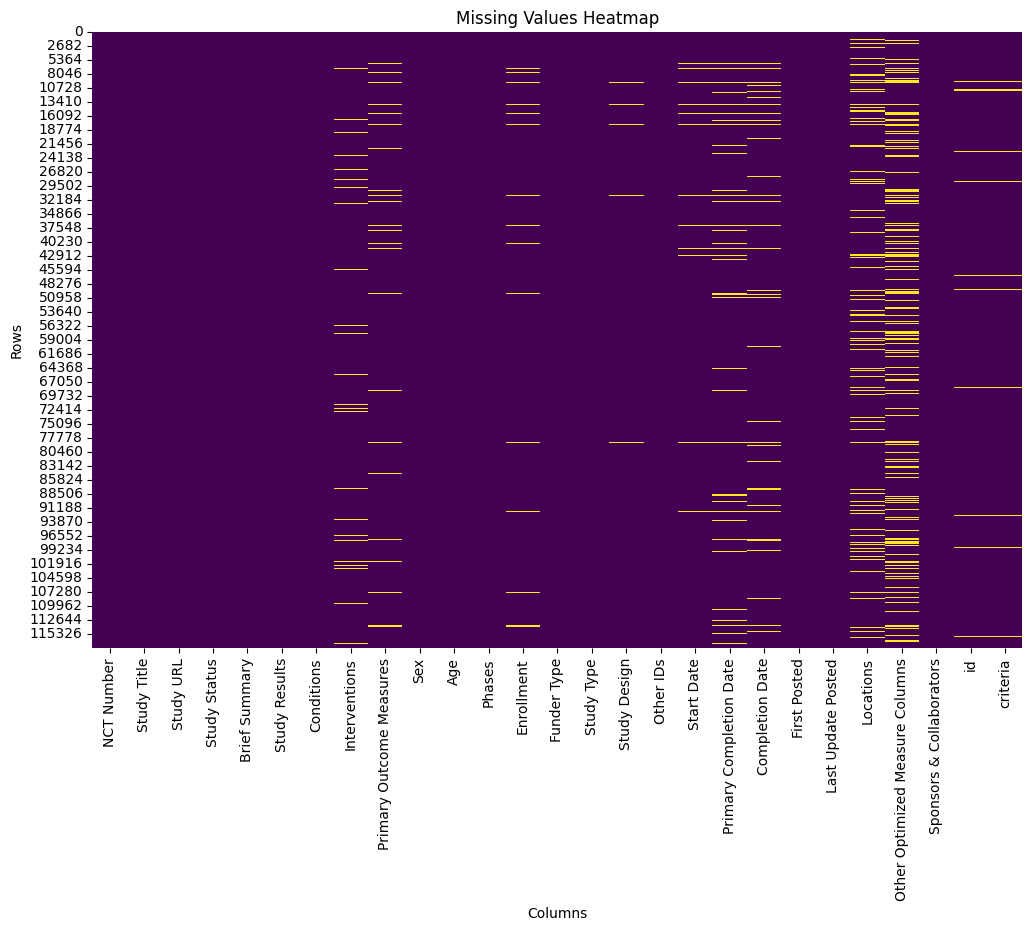

Columns with more than 20% missing values:
Other Optimized Measure Columns    20.339041
dtype: float64


In [255]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df_v3.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_v3.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap_after_joining_with_eligibilits.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

In [256]:
df_v3.shape

(117980, 27)

In [257]:
df_v3.to_csv('final_data.csv', index=False)

In [258]:
df_v3.sample(50).to_csv('final_data_sample.csv', index=False)